In [1]:
#import the required modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset
df = pd.read_csv("Group_2_data_cleaned.csv")

In [3]:
X = df.drop(columns=['Result','Unnamed: 0'])
y = df.Result.values

In [4]:
#splitting the train and test data
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,random_state=42,stratify=y, test_size=0.25 )

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [5]:
from imblearn.over_sampling import SMOTE
X_sampled, y_sampled= SMOTE().fit_resample(X_train_full,y_train_full)

In [6]:
from sklearn.metrics import accuracy_score, precision_score,recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

classifiers = [
    KNeighborsClassifier(p=2, weights='distance'),
    LogisticRegression(penalty= 'l2', class_weight= 'balanced'),
    SGDClassifier(alpha=0.01, l1_ratio=0.7),
    RandomForestClassifier(max_depth=70, max_features='log2', n_estimators=62),
    SVC(kernel="rbf",C=1, gamma=1, probability=True),
    LinearSVC(C= 0.01)
    ]

In [7]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy","Precision","Recall"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_sampled, y_sampled)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_valid)
    acc = accuracy_score(y_valid, train_predictions)
    print("Accuracy: {:.3%}".format(acc))
    p = precision_score(y_valid, train_predictions,average='weighted')
    print("Precision: {:.3%}".format(p))
    r= recall_score(y_valid, train_predictions,average='macro')
    print('Recall: %.3f' %r)
    
    log_entry = pd.DataFrame([[name, acc*100,p*100,r*100]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 96.063%
Precision: 96.279%
Recall: 0.971
LogisticRegression
****Results****
Accuracy: 80.315%
Precision: 85.021%
Recall: 0.808
SGDClassifier
****Results****
Accuracy: 75.197%
Precision: 82.996%
Recall: 0.786
RandomForestClassifier
****Results****
Accuracy: 96.063%
Precision: 96.300%
Recall: 0.972
SVC
****Results****
Accuracy: 95.669%
Precision: 95.923%
Recall: 0.970
LinearSVC
****Results****
Accuracy: 76.378%
Precision: 81.738%
Recall: 0.754


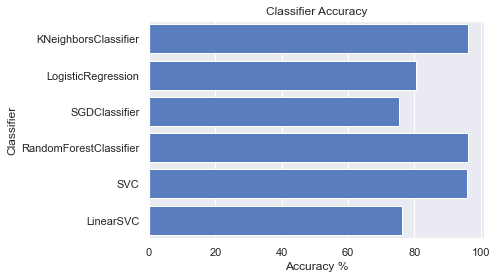

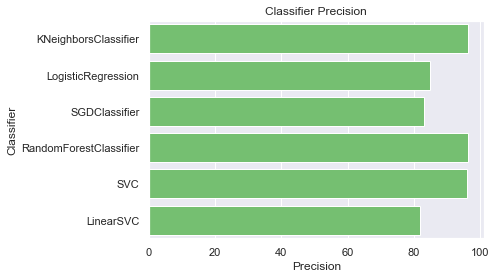

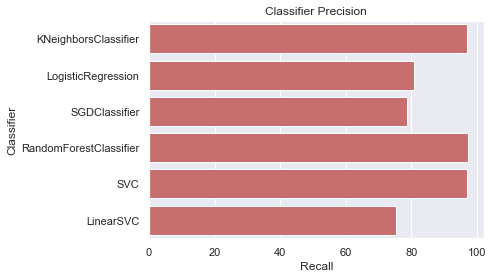

In [8]:
import seaborn as sns
sns.set(color_codes=True)

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Precision', y='Classifier', data=log, color="g")

plt.xlabel('Precision')
plt.title('Classifier Precision')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Recall', y='Classifier', data=log, color="r")

plt.xlabel('Recall')
plt.title('Classifier Precision')
plt.show()

### Variable selection 1 and  testing the performance with test data

In [9]:
X_select_1 = df.drop(columns=['Result','Unnamed: 0','web_traffic'])
y_select_1 = df.Result.values

In [10]:
#splitting the train and test data
X_train_full, X_test, y_train_full, y_test = train_test_split(X_select_1, y_select_1,random_state=42,stratify=y, test_size=0.25 )

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [11]:
from imblearn.over_sampling import SMOTE
X_sampled, y_sampled= SMOTE().fit_resample(X_train_full,y_train_full)

In [12]:
best_model=RandomForestClassifier(max_depth=70, max_features='log2', n_estimators=62)

In [13]:
best_model.fit(X_sampled,y_sampled)

RandomForestClassifier(max_depth=70, max_features='log2', n_estimators=62)

In [14]:
cnf=confusion_matrix(y_test,best_model.predict(X_test))
cnf

array([[157,   2,  17],
       [  2,  21,   3],
       [  8,   8, 121]], dtype=int64)

Text(0.5, 1.1, 'Confusion matrix')

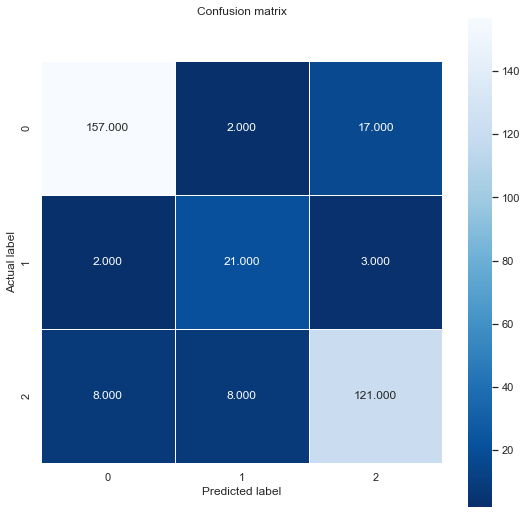

In [15]:
#plotting the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cnf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion matrix', y=1.1)

In [16]:
print(classification_report(y_test,best_model.predict(X_test) ))

              precision    recall  f1-score   support

          -1       0.94      0.89      0.92       176
           0       0.68      0.81      0.74        26
           1       0.86      0.88      0.87       137

    accuracy                           0.88       339
   macro avg       0.83      0.86      0.84       339
weighted avg       0.89      0.88      0.88       339



### variable selection 2 and  testing the performance with test data

In [17]:
X_select_2 = df.drop(columns=['Result','Unnamed: 0','age_of_domain'])
y_select_2 = df.Result.values

In [18]:
#splitting the train and test data
X_train_full, X_test, y_train_full, y_test = train_test_split(X_select_2, y_select_2,random_state=42,stratify=y, test_size=0.25 )

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [19]:
from imblearn.over_sampling import SMOTE
X_sampled, y_sampled= SMOTE().fit_resample(X_train_full,y_train_full)

In [20]:
best_model_2=RandomForestClassifier(max_depth=70, max_features='log2', n_estimators=62)

In [21]:
best_model_2.fit(X_sampled,y_sampled)

RandomForestClassifier(max_depth=70, max_features='log2', n_estimators=62)

In [22]:
cnf=confusion_matrix(y_test,best_model_2.predict(X_test))
cnf

array([[157,   2,  17],
       [  1,  23,   2],
       [  8,   0, 129]], dtype=int64)

Text(0.5, 1.1, 'Confusion matrix')

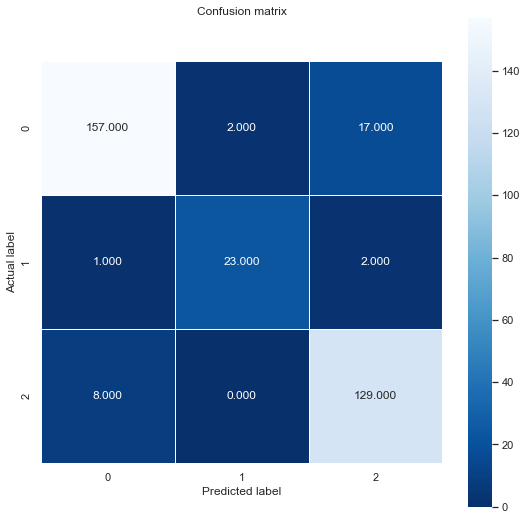

In [23]:
#plotting the confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cnf, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion matrix', y=1.1)

In [24]:
print(classification_report(y_test,best_model_2.predict(X_test) ))

              precision    recall  f1-score   support

          -1       0.95      0.89      0.92       176
           0       0.92      0.88      0.90        26
           1       0.87      0.94      0.91       137

    accuracy                           0.91       339
   macro avg       0.91      0.91      0.91       339
weighted avg       0.91      0.91      0.91       339

